## The most nobel of prizes
The Nobel Prize is perhaps the world's most well known scientific award. Except for the honor, prestige and substantial prize money the recipient also gets a gold medal showing Alfred Nobel (1833 - 1896) who established the prize. Every year it's given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. The first Nobel Prize was handed out in 1901, and at that time the Prize was very Eurocentric and male-focused, but nowadays it's not biased in any way whatsoever. Surely. Right?
Well, we're going to find out! The Nobel Foundation has made a dataset available of all prize winners from the start of the prize, in 1901, to 2016. Let's load it in and take a look.

In [2]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np

# Reading in the Nobel Prize data
nobel = pd.read_csv('../data/nobelprize.csv')

# Taking a look at the first several winners
nobel.head()

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [3]:
# display info regarding the dataset
nobel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 18 columns):
Year                    969 non-null int64
Category                969 non-null object
Prize                   969 non-null object
Motivation              881 non-null object
Prize Share             969 non-null object
Laureate ID             969 non-null int64
Laureate Type           969 non-null object
Full Name               969 non-null object
Birth Date              940 non-null object
Birth City              941 non-null object
Birth Country           943 non-null object
Sex                     943 non-null object
Organization Name       722 non-null object
Organization City       716 non-null object
Organization Country    716 non-null object
Death Date              617 non-null object
Death City              599 non-null object
Death Country           605 non-null object
dtypes: int64(2), object(16)
memory usage: 136.3+ KB


### Task 1: Count up the Nobel Prizes. Also, split by sex and birth_country.

In [4]:
# count of nobel prizes
display(len(nobel['Prize Share']))

969

In [6]:
# split by sex
nobel.groupby('Sex')['Prize Share'].count()

Sex
Female     50
Male      893
Name: Prize Share, dtype: int64

In [12]:
# display top 10
display(type(nobel.groupby('Birth Country')['Prize Share'].count()))
# store the resulting Series object
birth_country = nobel.groupby('Birth Country')['Prize Share'].count()
# sort and display the top 10
birth_country.sort_values(ascending=False)[:10]

pandas.core.series.Series

Birth Country
United States of America    276
United Kingdom               88
Germany                      70
France                       53
Sweden                       30
Japan                        29
Russia                       20
Netherlands                  19
Italy                        18
Canada                       18
Name: Prize Share, dtype: int64

In [16]:
### Task 1: Count up the Nobel Prizes. Also, split by sex and birth_country.
# using value_counts()
display(nobel['Sex'].value_counts())
nobel['Birth Country'].value_counts().head(10)

Male      893
Female     50
Name: Sex, dtype: int64

United States of America    276
United Kingdom               88
Germany                      70
France                       53
Sweden                       30
Japan                        29
Russia                       20
Netherlands                  19
Italy                        18
Canada                       18
Name: Birth Country, dtype: int64

## Task 3: Create a DataFrame with two columns: decade and proportion of USA-born Nobel Prize winners that decade.

> TIP: When you are asked to calculate proportions think of booleans. Do you have a column with boolean values ? Can you create a new column with boolean values from an existing column ?

In this case, since we are asked to calculate USA born winners per decade, it will help to create a new column `usa_born_winner`. You will calculate this by marking the column values to `True` when birth_country is USA.

In [40]:
# clean up the column names
nobel.columns = nobel.columns.str.lower()
nobel.columns = nobel.columns.str.replace(' ', '_')

In [41]:
nobel.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'],
      dtype='object')

In [51]:
# Calculating the proportion of USA born winners per decade
nobel['usa_born_winner'] = nobel.birth_country == 'United States of America'
nobel['decade'] = nobel.year.apply(lambda x: int(np.floor(x/10)*10))
prop_usa_winners = nobel.groupby('decade')['usa_born_winner'].mean()

# Display the proportions of USA born winners per decade
# ... YOUR CODE FOR TASK 3 ...
prop_usa_winners

decade
1900    0.017241
1910    0.075000
1920    0.074074
1930    0.241935
1940    0.288889
1950    0.278481
1960    0.262500
1970    0.308411
1980    0.313131
1990    0.392523
2000    0.414286
2010    0.336735
Name: usa_born_winner, dtype: float64

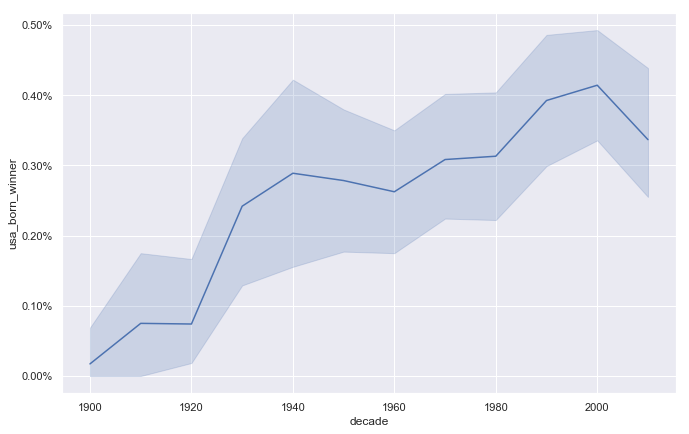

In [53]:
# Setting the plotting theme
sns.set()
# and setting the size of all plots.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [11, 7]

# Plotting USA born winners 
ax = sns.lineplot(x=nobel.decade, y=nobel.usa_born_winner)

# Adding %-formatting to the y-axis
from matplotlib.ticker import PercentFormatter
# ... YOUR CODE FOR TASK 4 ...
ax.yaxis.set_major_formatter(PercentFormatter())

### Task 5: Plot the proportion of female laureates by decade split by prize category.

In [54]:
nobel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 20 columns):
year                    969 non-null int64
category                969 non-null object
prize                   969 non-null object
motivation              881 non-null object
prize_share             969 non-null object
laureate_id             969 non-null int64
laureate_type           969 non-null object
full_name               969 non-null object
birth_date              940 non-null object
birth_city              941 non-null object
birth_country           943 non-null object
sex                     943 non-null object
organization_name       722 non-null object
organization_city       716 non-null object
organization_country    716 non-null object
death_date              617 non-null object
death_city              599 non-null object
death_country           605 non-null object
usa_born_winner         969 non-null bool
decade                  969 non-null int64
dtypes: bool(1), int

In [59]:
nobel['is_female'] = nobel.sex == 'Female'

In [62]:
nobel.groupby(['decade', 'category'], as_index=False)['is_female'].mean()

,decade,category,is_female
0,1900,Chemistry,0.000000
1,1900,Literature,0.100000
2,1900,Medicine,0.000000
3,1900,Peace,0.071429
4,1900,Physics,0.076923
5,1910,Chemistry,0.125000
6,1910,Literature,0.000000
7,1910,Medicine,0.000000
8,1910,Peace,0.000000
9,1910,Physics,0.000000
